In [290]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        #init mean, var, priors
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)

        for c in range(n_classes):
            X_c = X[c==y]
            self.mean[c,:] = X_c.mean(axis=0)
            self.var[c,:] = X_c.var(axis=0)
            self.priors[c] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            llhood = np.sum(np.log(self._pdf(idx, X)))
            posterior = prior + llhood
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator/denominator

In [291]:
def train_test_split(X, y, test_size=.2):
    indices = np.random.permutation(X.shape[0])
    n = int(X.shape[0]*(1-.2))
    training_idx, test_idx = indices[:n], indices[n:]
    X_train, X_test = X.iloc[training_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[training_idx], y.iloc[test_idx]
    
    return X_train,X_test,y_train,y_test

In [292]:
def standard_scalar(x):
    m = np.mean(x)
    s = np.sqrt(np.var(x))
    return ((x - m)/s)

In [293]:
import pandas as pd 

data = pd.read_csv("/home/ibab/Downloads/Assignment/classificationdataset/train.csv")
data2 = pd.read_csv("/home/ibab/Downloads/Assignment/classificationdataset/test.csv")
data = pd.concat([data,data2])
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
382,1274,NaN,3,"Risien, Mrs. Samuel (Emma)",female,NaN,0,0,364498,14.5000,NaN,S
640,641,0.0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
459,460,0.0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
473,474,1.0,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C


In [302]:
req_data = data.copy()
print(req_data.count())

#fill na values in Embarked with the mode
req_data['Embarked'].fillna(req_data["Embarked"].mode()[0], inplace=True)

#fill na values in Age with mean
req_data["Age"].fillna(int(req_data["Age"].mean()), inplace=True)

#fill missing price row
req_data["Fare"].fillna(int(req_data["Fare"].mean()), inplace=True)
print('-' * 40)
print(req_data.count())

PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64
----------------------------------------
PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Ticket         1309
Fare           1309
Cabin           295
Embarked       1309
dtype: int64


In [303]:
#one hot encoding

req_data = pd.get_dummies(req_data, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

#drop uninformative columns

req_data.drop(columns=["Cabin","PassengerId","Name","Ticket"], inplace=True)
req_data

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,7.2500,0,1,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,0,0,1
4,0.0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,29.0,0,0,8.0500,0,1,1,0,1
414,NaN,39.0,0,0,108.9000,0,0,0,0,0
415,NaN,38.5,0,0,7.2500,0,1,1,0,1
416,NaN,29.0,0,0,8.0500,0,1,1,0,1


In [304]:
#check
print(req_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         1309 non-null   float64
 2   SibSp       1309 non-null   int64  
 3   Parch       1309 non-null   int64  
 4   Fare        1309 non-null   float64
 5   Pclass_2    1309 non-null   uint8  
 6   Pclass_3    1309 non-null   uint8  
 7   Sex_male    1309 non-null   uint8  
 8   Embarked_Q  1309 non-null   uint8  
 9   Embarked_S  1309 non-null   uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 67.8 KB
None


In [305]:
#scale the features

features = ["Age", "Fare"]
req_data[features] = req_data[features].apply(standard_scalar)
req_data

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,-0.598000,1,0,-0.503590,0,1,1,0,1
1,1.0,0.643936,1,0,0.734507,0,0,0,0,0
2,1.0,-0.287516,0,0,-0.490539,0,1,0,0,1
3,1.0,0.411073,1,0,0.382929,0,0,0,0,1
4,0.0,0.411073,0,0,-0.488122,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,-0.054653,0,0,-0.488122,0,1,1,0,1
414,NaN,0.721557,0,0,1.461834,0,0,0,0,0
415,NaN,0.682746,0,0,-0.503590,0,1,1,0,1
416,NaN,-0.054653,0,0,-0.488122,0,1,1,0,1


In [311]:
train_data = req_data.iloc[:891,:] # split the train data 
test_data = req_data.iloc[891:,:]

X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    return accuracy

model = NaiveBayes()
model.fit(X_train, y_train)
predictions=[]
for i in range(X_test.shape[0]):
    pred = model.predict(X_test.iloc[i,])
    predictions.append(pred)
    


print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.776536312849162


<AxesSubplot:>

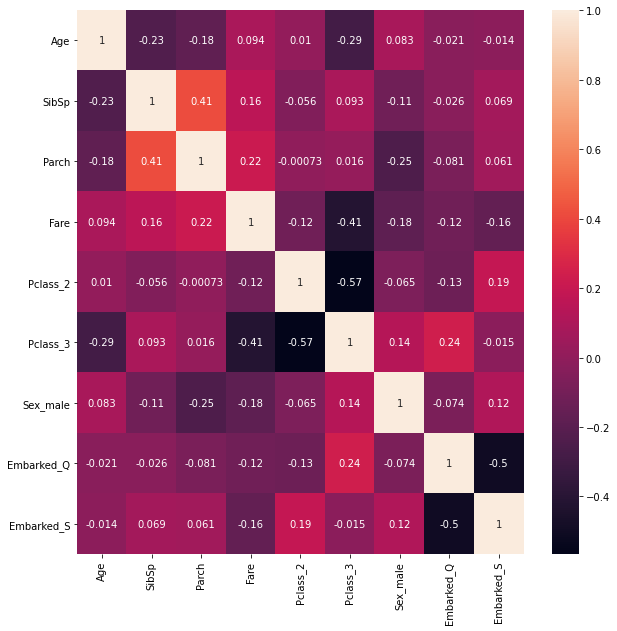

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat= X.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,annot=True, )

In [314]:
model.weights

AttributeError: 'NaiveBayes' object has no attribute 'weights'